<a href="https://colab.research.google.com/github/Vish-shubh/Air-index-quality-check./blob/main/numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [40]:

df.shape

(29531, 16)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [49]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [51]:
for i in df.columns:
    print('column name:{}    unique values:{}'.format(i,df[i].nunique()))

column name:City    unique values:26
column name:Date    unique values:2009
column name:PM2.5    unique values:11716
column name:PM10    unique values:12571
column name:NO    unique values:5776
column name:NO2    unique values:7404
column name:NOx    unique values:8156
column name:NH3    unique values:5922
column name:CO    unique values:1779
column name:SO2    unique values:4761
column name:O3    unique values:7699
column name:Benzene    unique values:1873
column name:Toluene    unique values:3608
column name:Xylene    unique values:1561
column name:AQI    unique values:829
column name:AQI_Bucket    unique values:6


In [52]:
df['PM2.5']=df['PM2.5'].fillna(df['PM2.5'].mean())
df['PM10']=df['PM10'].fillna(df['PM10'].mean())
df['NO']=df['NO'].fillna(df['NO'].mean())
df['NO2']=df['NO2'].fillna(df['NO2'].mean())
df['NOx']=df['NOx'].fillna(df['NOx'].mean())
df['NH3']=df['NH3'].fillna(df['NH3'].mean())
df['CO']=df['CO'].fillna(df['CO'].mean())
df['SO2']=df['SO2'].fillna(df['SO2'].mean())
df['O3']=df['O3'].fillna(df['O3'].mean())
df['Benzene']=df['Benzene'].fillna(df['Benzene'].mean())
df['Toluene']=df['Toluene'].fillna(df['Toluene'].mean())
df['Xylene']=df['Xylene'].fillna(df['Xylene'].mean())
df['AQI']=df['AQI'].fillna(df['AQI'].mode()[0])
df['AQI_Bucket']=df['AQI_Bucket'].fillna('Moderate')

In [55]:
# WE ARE FILLING MISSING VALUES IN 2 DIFFERENT CATEGORIES

# FOR NUMERIC VALUES : MEAN()

# FOR CATEGORICAL VALUES : MODE()

In [56]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [57]:
# Population in each city

In [58]:
Avg_polluted = df[['City', 'AQI', 'PM10', 'CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
Avg_polluted

,AQI,PM10,CO
City,,,
Ahmedabad,334.485814,117.409318,16.147420
Delhi,258.703833,228.413747,1.976053
Lucknow,211.276755,118.127103,2.131976
Patna,210.979010,119.013316,1.591700
Gurugram,208.550923,150.467320,1.321857
Talcher,155.490811,156.552639,1.911862
Jorapokhar,139.759624,142.240508,1.358846
Guwahati,139.579681,116.604900,0.738284
Brajrajnagar,138.699360,123.094114,1.870288


In [59]:
# highly polution city are Ahmedabad, Delhi, Lucknow

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'AQI')

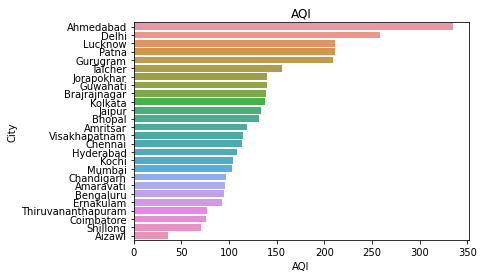

In [63]:
sns.barplot(Avg_polluted.AQI,Avg_polluted.index)
plt.title('AQI')

Text(0.5, 1.0, 'pm10')

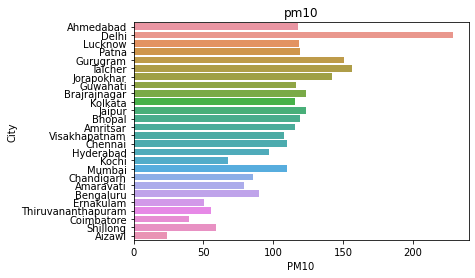

In [64]:
sns.barplot(x = Avg_polluted.PM10,y = Avg_polluted.index)
plt.title('pm10')

Text(0.5, 1.0, 'CO')

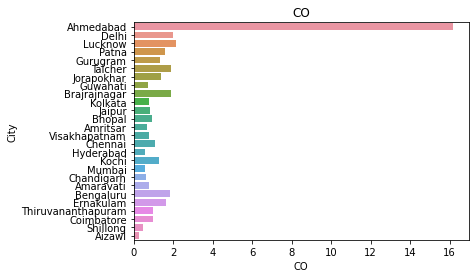

In [66]:
sns.barplot(x = Avg_polluted.CO,y = Avg_polluted.index)
plt.title('CO')